## Credit Card Fraud Detection

In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split

In [2]:
# Loading The Data
data = pd.read_csv('creditcard.csv')
data.head()
#V1-V28 are special features created to hide sensitive information about the original data.
# Class: 0 for normal transactions, 1 for fraudulent transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Analyzing Class Distribution

In [3]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outliner_percentage = (len(fraud)/float(len(valid)))*100 # Percentage of fradulant transactions

print(f"Fraud Cases: {len(fraud)}")
print(f"Valid Transaction: {len(valid)}")
print(f"Fraudulant percentage {round(outliner_percentage, 2)}%")


Fraud Cases: 492
Valid Transaction: 284315
Fraudulant percentage 0.17%


### Exploring Transaction Amount

In [4]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [5]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

From the above output we can observe that fradulant transactions tend to have higher average amount which is important in fraud detection

### Plotting Correlation Matrix

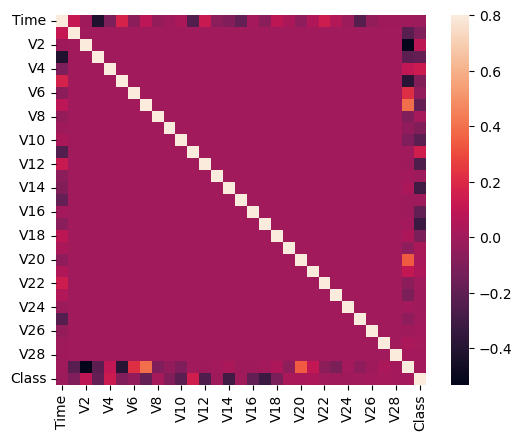

In [6]:
# Correlation between features using a heatmap
corrmat = data.corr()
fig = plt.Figure(figsize= (12, 9))
sns.heatmap(corrmat, vmax= .8, square= True)
plt.show()

### Preparing Data

In [7]:
#Separate the input features (X) and target variable (Y) then split the data into training and testing sets
x = data.drop(['Class'], axis=1)
y = data['Class']
xData = x.values
yData = y.values

xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

### Building and Training the model 

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()  #Initialized an new instance of the RandomFosterClassifier
rfc.fit(xTrain, yTrain)  #Trains the RandomForestClassifier model on the training data


yPred = rfc.predict(xTest)  #Uses the trained model to predict the target labels

## Evaluating the Model

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9740
Recall: 0.7653
F1-Score: 0.8571
Matthews Correlation Coefficient: 0.8632


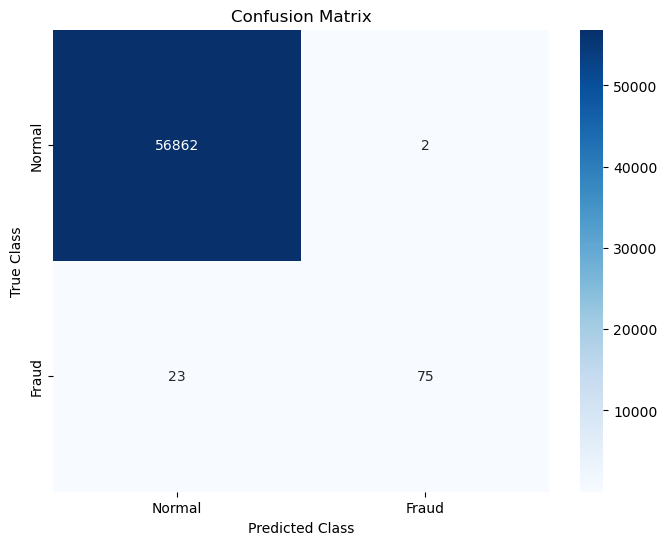

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix 

# Calculate common evaluation metrics for classification
accuracy = accuracy_score(yTest, yPred)   # Overall percentage of correct predictions
precision = precision_score(yTest, yPred) # Out of all predicted fraud cases, how many are actually fraud
recall = recall_score(yTest, yPred)       # Out of all actual fraud cases, how many did the model detect
f1 = f1_score(yTest, yPred)               # Harmonic mean of precision and recall (balance between the two)
mcc = matthews_corrcoef(yTest, yPred)     # A balanced metric, useful for imbalanced datasets like fraud detection

# Print the metrics in a formatted way
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")        # Show accuracy with 4 decimal places
print(f"Precision: {precision:.4f}")      # Show precision with 4 decimal places
print(f"Recall: {recall:.4f}")            # Show recall with 4 decimal places
print(f"F1-Score: {f1:.4f}")              # Show F1-score with 4 decimal places
print(f"Matthews Correlation Coefficient: {mcc:.4f}")  # Show MCC with 4 decimal places

# Create and plot confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)   # 2x2 table: [TN, FP; FN, TP]

# Visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'],  # Predicted labels
            yticklabels=['Normal', 'Fraud'])  # True labels
plt.title("Confusion Matrix")   # Title of the plot
plt.xlabel("Predicted Class")   # X-axis = model predictions
plt.ylabel("True Class")        # Y-axis = actual labels
plt.show()
